<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/Noise_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


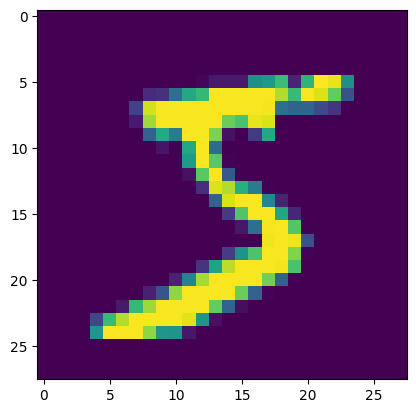

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation ='relu'))
encoder.add(Dense(200,activation ='relu'))
encoder.add(Dense(100,activation ='relu'))
encoder.add(Dense(50,activation ='relu'))
encoder.add(Dense(25,activation ='relu'))

In [9]:
decoder = Sequential()

decoder.add(Dense(50,activation ='relu',input_shape = [25]))
decoder.add(Dense(100,activation ='relu'))
decoder.add(Dense(200,activation ='relu'))
decoder.add(Dense(400,activation ='relu'))
decoder.add(Dense(784,activation ='sigmoid'))
decoder.add(Reshape([28,28]))

In [10]:
autoencoder = Sequential([encoder,decoder])

In [11]:
autoencoder.compile(loss ='binary_crossentropy',optimizer = SGD(learning_rate = 1.5),metrics = ['accuracy'])

In [12]:
autoencoder.fit(X_train,X_train,epochs =5,validation_data = [X_test,X_test])

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2505 - accuracy: 0.0868 - val_loss: 0.2069 - val_accuracy: 0.1314
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1834 - accuracy: 0.1661 - val_loss: 0.1627 - val_accuracy: 0.1895
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1571 - accuracy: 0.2015 - val_loss: 0.1506 - val_accuracy: 0.2155
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1464 - accuracy: 0.2162 - val_loss: 0.1416 - val_accuracy: 0.2168
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1409 - accuracy: 0.2240 - val_loss: 0.1399 - val_accuracy: 0.2310


In [13]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 358ms/step


Original Image


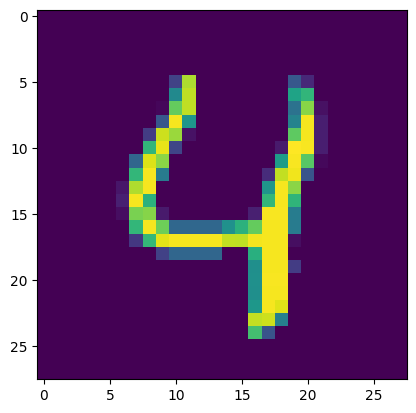

predicted image


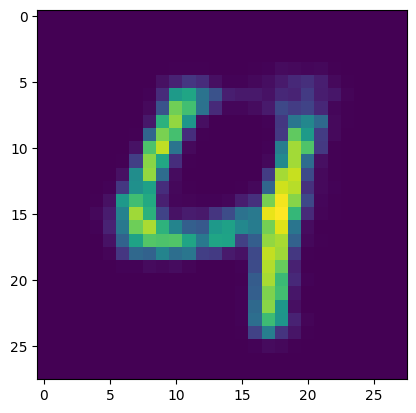

In [16]:
n = 4
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("predicted image")
plt.imshow(passed_images[n])